Load the test data set of volcano1 to 10

Steps:

1) Understand each volcano has different parameters

2) Text files have to be stitched to make a continuous set

3) Break into train, test modules

4) Evaluate different regression techniques' suitability

5) Determine the effectiveness of these techniques in improving the understanding and predictive capabilities related to volcanic activities.

In [60]:
#Get tsfresh - did this after watching video!!! :( should have watched the video earlier
!pip install tsfresh

# **LOAD ALL LIBRARIES**

In [61]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression

# **Investigate the data**

In [62]:
#Import each of volcano data and combine into one dataframe
filepath = 'observation1.txt'
with open (filepath) as f:
  #total = f.readlines()
  #print(total)
  #skip_value = total.index('tilt_erupt')
  skip_value = 14
  #print(skip_value)
  #Challenge1: simple conversion has initial values, strip first 9 rows
  dataframe1 = pd.read_csv(filepath,skiprows=skip_value)
print(dataframe1)
len(dataframe1)

          -1052         -1051         -1050         -1049         -1048  \
0 -4.877751e-12 -5.417697e-11  6.289086e-11  8.049237e-11  1.697267e-10   

          -1047         -1046         -1045         -1044         -1043  ...  \
0  3.356124e-11  1.091938e-10  6.711052e-11 -7.239533e-11 -5.737629e-11  ...   

             -9            -8            -7            -6            -5  \
0  5.713740e-10  1.102190e-09  9.032213e-10  1.156534e-09  1.601398e-09   

             -4            -3            -2            -1             0  
0  1.609824e-09  1.985431e-09  2.390970e-09  2.746501e-09  3.215824e-09  

[1 rows x 1054 columns]


1

In [63]:
dataframe1T = dataframe1.T    #Transpose
dataframe1T.reset_index()     #Reset index to get time into one of the columns
dataframe1T.head(n=4)         #check the head

,0
-1052,-4.877751e-12
-1051,-5.417697e-11
-1050,6.289086e-11
-1049,8.049237e-11


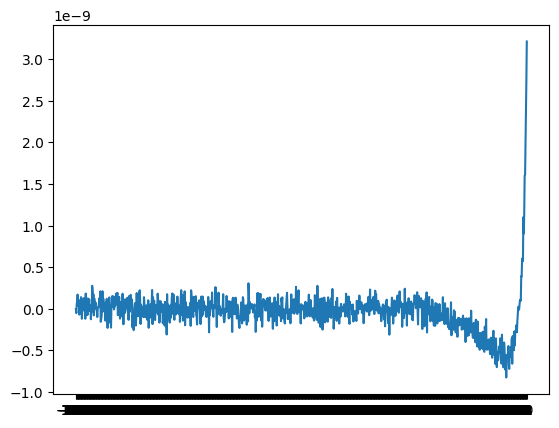

In [64]:
#Visualize
plt.plot(dataframe1T)       #Plot to see how the values look like, this is our data to use

In [65]:
#Now lets start clubbing all of the data for volcano1, check the same for observation2
filepath2 = 'observation2.txt'
dataframe2 = pd.read_csv(filepath2,skiprows=skip_value)

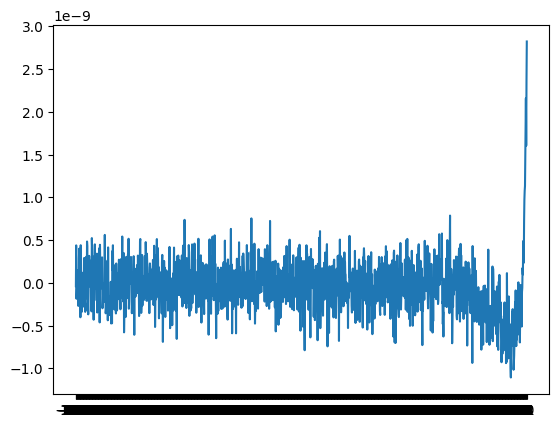

In [66]:
dataframe2T = dataframe2.T
dataframe2T.reset_index()
dataframe2T                     #this table has 1499 rows and hence not same size
plt.plot(dataframe2T)

# **Get all of one volcano data into one dataframe**

We will use the glob library, to get each dataframe and create one single dataframe for first volcano

In [67]:
#Lets try to use glob to get all the files at once and concatenate
import glob

path = 'observation'
filenames = glob.glob(path+ '*.txt')

dfs = []

k=0
for filename in filenames:
  #df, dft =DataFrame(), DataFrame()
  df = pd.read_csv(filepath2,skiprows=skip_value)
  dft = df.T
  dft.reset_index()
  #code for dropping
  fulllen=len(dft)
  if(fulllen>1000):
    dfnew=dft.drop(dft.index[:(fulllen-1000)])
  dfnew.insert(loc=0,column='id',value=[k]*1000)
  dfnew.insert(loc=1,column='Time',value=range(-1000,0))
  dfs.append(dfnew)
  k+=1

#concatenate all data into one single dataframe
big_frame = pd.concat(dfs, ignore_index=True)


In [68]:
y1 = [True]*len(filenames)
#len(big_frame)    #confirm the number of rows, 1000*(#files)
big_frame.rename(columns={0:'Sensor'}, inplace=True)
big_frame
len(y1)

12

# **Load and Visualize the data**

Using plot, we will plot a couple of the observations

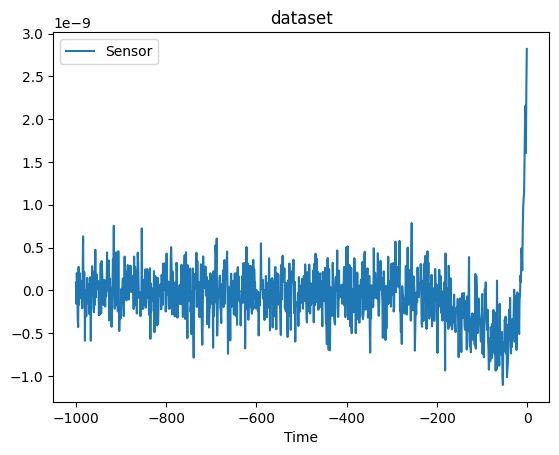

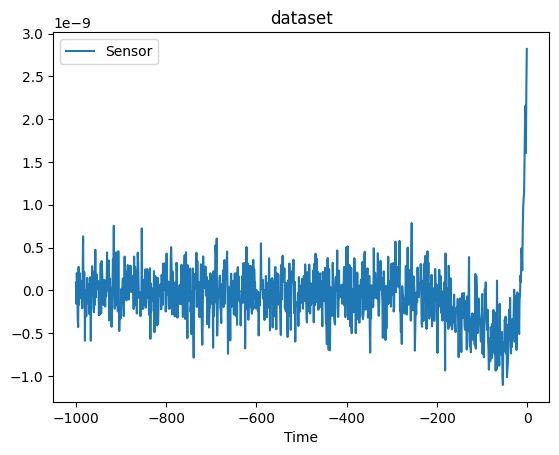

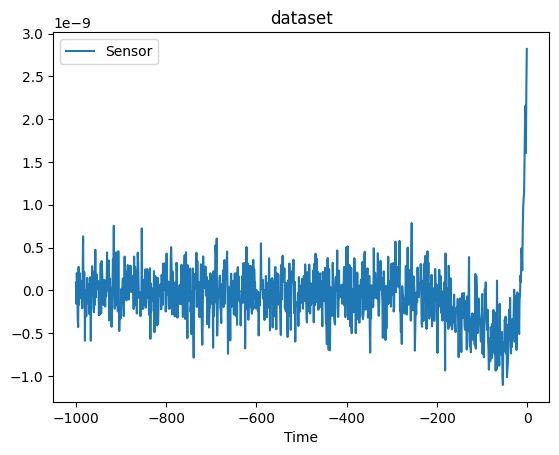

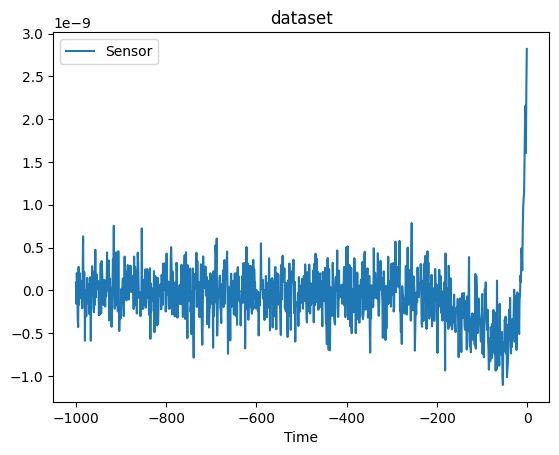

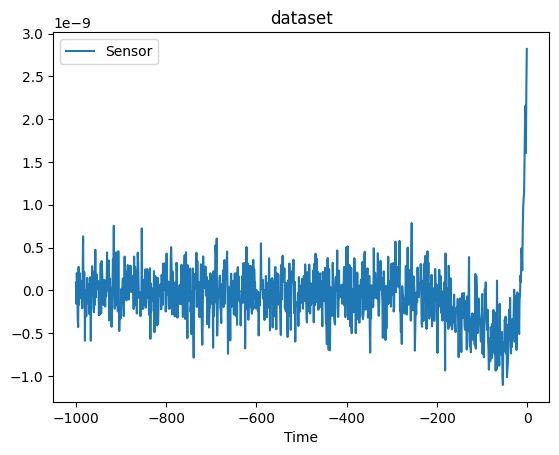

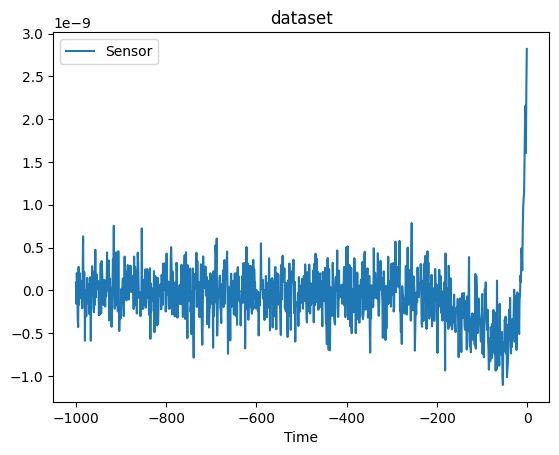

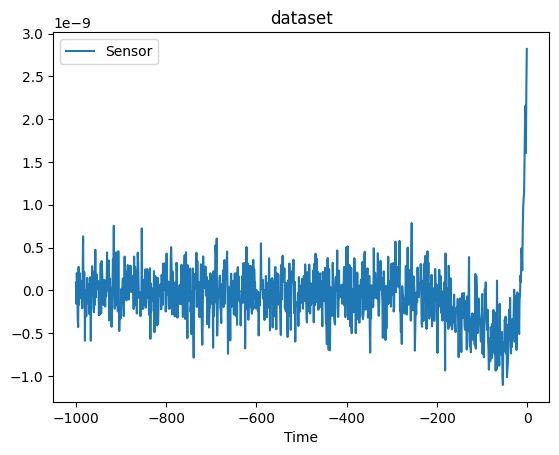

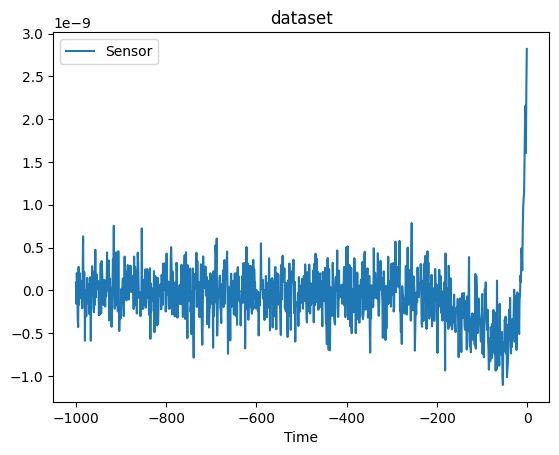

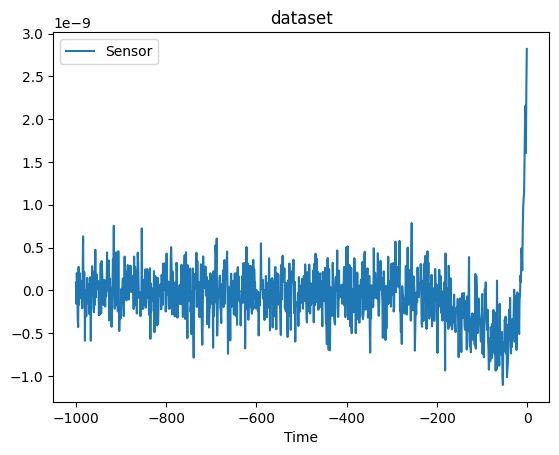

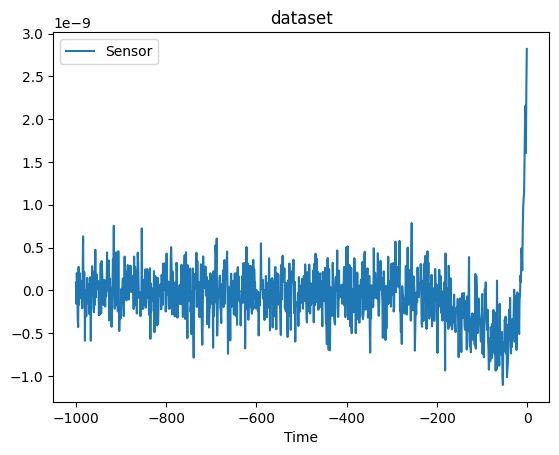

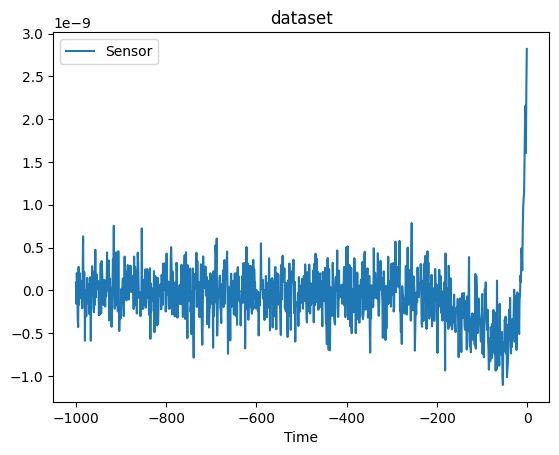

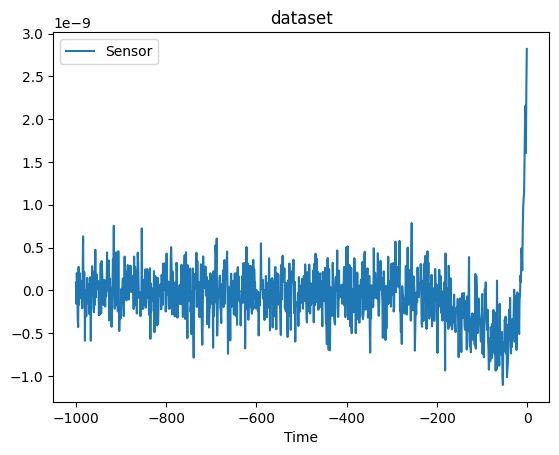

In [69]:
#Now lets plot all of the erruptions for volcano1
for index in range(len(filenames)):
  big_frame[big_frame.id==index][['Time','Sensor']].plot(x='Time',title='dataset');
#big_frame[big_frame.id==10][['Time','Sensor']].plot(x='Time',title='dataset');

# **Explanatory Data Analysis**

We can use to extract the time series features using 'tsfresh'. We want to extract the features for each time series,

In [70]:
#This code will be redundant - jump to time series Estimation (next chapter)
extraction_settings = ComprehensiveFCParameters()

#impute to remove all NaN numbers
X1 = extract_features(big_frame, column_id = 'id', column_sort = 'Time', default_fc_parameters=extraction_settings,impute_function = impute)


Feature Extraction: 100%|██████████| 12/12 [00:16<00:00,  1.35s/it]


In [71]:
#Check X
X1.head()

,Sensor__variance_larger_than_standard_deviation,Sensor__has_duplicate_max,Sensor__has_duplicate_min,Sensor__has_duplicate,Sensor__sum_values,Sensor__abs_energy,Sensor__mean_abs_change,Sensor__mean_change,Sensor__mean_second_derivative_central,Sensor__median,...,Sensor__fourier_entropy__bins_5,Sensor__fourier_entropy__bins_10,Sensor__fourier_entropy__bins_100,Sensor__permutation_entropy__dimension_3__tau_1,Sensor__permutation_entropy__dimension_4__tau_1,Sensor__permutation_entropy__dimension_5__tau_1,Sensor__permutation_entropy__dimension_6__tau_1,Sensor__permutation_entropy__dimension_7__tau_1,Sensor__query_similarity_count__query_None__threshold_0.0,Sensor__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,0.0,-6.709856e-08,1.215321e-16,2.773444e-10,2.735467e-12,3.538912e-13,-6.521442e-11,...,1.336155,1.997774,3.950486,1.788632,3.166302,4.73179,6.185406,6.761902,0.0,1.932278e-09
1,0.0,0.0,0.0,0.0,-6.709856e-08,1.215321e-16,2.773444e-10,2.735467e-12,3.538912e-13,-6.521442e-11,...,1.336155,1.997774,3.950486,1.788632,3.166302,4.73179,6.185406,6.761902,0.0,1.932278e-09
2,0.0,0.0,0.0,0.0,-6.709856e-08,1.215321e-16,2.773444e-10,2.735467e-12,3.538912e-13,-6.521442e-11,...,1.336155,1.997774,3.950486,1.788632,3.166302,4.73179,6.185406,6.761902,0.0,1.932278e-09
3,0.0,0.0,0.0,0.0,-6.709856e-08,1.215321e-16,2.773444e-10,2.735467e-12,3.538912e-13,-6.521442e-11,...,1.336155,1.997774,3.950486,1.788632,3.166302,4.73179,6.185406,6.761902,0.0,1.932278e-09
4,0.0,0.0,0.0,0.0,-6.709856e-08,1.215321e-16,2.773444e-10,2.735467e-12,3.538912e-13,-6.521442e-11,...,1.336155,1.997774,3.950486,1.788632,3.166302,4.73179,6.185406,6.761902,0.0,1.932278e-09


Currently, the above cell gives the count with sensor values lesser than the standard deviation, sum values, etc..

# **Selected Features**

Using the hypothesis tests in the tsfresh package, select only the relevant features out of this large dataset (X), which is 5x783

tsfresh does this task for us

In [72]:
#Get filtered features - SKIP
#X_filtered = select_features(X)

# **Train and evaluate classifier**

Now lets train a boosted decision tree on the data

In [73]:
X_full_train, X_full_test, y_train1, y_test1 = train_test_split(X1, y1, test_size=.4)

In [74]:
#X_full_train

In [75]:
#y_train1

Next add the classifier - we will use the decision tree

In [76]:
#classifier_full = DecisionTreeClassifier()
#classifier_full.fit(X_full_train, y_train1)
#print(classification_report(y_test1, classifier_full.predict(X_full_test)))

Here, if I use the data as in, I am getting success with 100% precision.

Why is that?

Because there are no false cases!

Hence this file needs to be re-written with failed cases.

# **Time Estimation**

Instead of estimating failure/success reformulate problem into prediction of sensor value based on time-series.

That means we have rebuilt the frame, with time series values and time. Luckily, we already have this information in the variable "big_frame". All we have to do, is redo the step of train/test sets, with the correct "y" (which is now the sensor reading value)

In [77]:
big_frame

,id,Time,Sensor
0,0,-1000,8.934927e-11
1,0,-999,-1.566669e-10
2,0,-998,1.999732e-10
3,0,-997,9.764826e-11
4,0,-996,-3.217666e-10
...,...,...,...
11995,11,-5,1.934484e-09
11996,11,-4,2.157700e-09
11997,11,-3,1.604247e-09
11998,11,-2,2.361730e-09


In [78]:
y = big_frame['Sensor'][:1000]
y

0      8.934927e-11
1     -1.566669e-10
2      1.999732e-10
3      9.764826e-11
4     -3.217666e-10
           ...     
995    1.934484e-09
996    2.157700e-09
997    1.604247e-09
998    2.361730e-09
999    2.822080e-09
Name: Sensor, Length: 1000, dtype: float64

In [79]:
#Implement window-sliding, window size of 20 (max 20 seconds in the past, disregard windows shorter than 5 seconds)
df_rolled = roll_time_series(big_frame[:1000], column_id='id', column_sort='Time', max_timeshift=20, min_timeshift=5)


Rolling: 100%|██████████| 1000/1000 [00:02<00:00, 426.06it/s]


In [80]:
df_rolled

,id,Time,Sensor
0,"(0, -995)",-1000,8.934927e-11
1,"(0, -995)",-999,-1.566669e-10
2,"(0, -995)",-998,1.999732e-10
3,"(0, -995)",-997,9.764826e-11
4,"(0, -995)",-996,-3.217666e-10
...,...,...,...
20770,"(0, -1)",-5,1.934484e-09
20771,"(0, -1)",-4,2.157700e-09
20772,"(0, -1)",-3,1.604247e-09
20773,"(0, -1)",-2,2.361730e-09


In [81]:
df_rolled.head()

,id,Time,Sensor
0,"(0, -995)",-1000,8.934927e-11
1,"(0, -995)",-999,-1.566669e-10
2,"(0, -995)",-998,1.999732e-10
3,"(0, -995)",-997,9.764826e-11
4,"(0, -995)",-996,-3.217666e-10


In [82]:
df_rolled[df_rolled['id'] == (0, -995) ]

,id,Time,Sensor
0,"(0, -995)",-1000,8.934927e-11
1,"(0, -995)",-999,-1.566669e-10
2,"(0, -995)",-998,1.999732e-10
3,"(0, -995)",-997,9.764826e-11
4,"(0, -995)",-996,-3.217666e-10
5,"(0, -995)",-995,-4.298022e-10


In [83]:
#df_rolled is now a dataframe with these windows out of original dataframe
#number of unique windows = 995
df_rolled['id'].nunique()

995

In [84]:
df_rolled.groupby('id').size().agg([np.min, np.max])

amin     6
amax    21
dtype: int64

# **Extract Features 2**

The rolled data sample can be now used for feature extraction. Features will be extracted using id, i.e. the data of a given window and a given id.

In [85]:
df_rolled

,id,Time,Sensor
0,"(0, -995)",-1000,8.934927e-11
1,"(0, -995)",-999,-1.566669e-10
2,"(0, -995)",-998,1.999732e-10
3,"(0, -995)",-997,9.764826e-11
4,"(0, -995)",-996,-3.217666e-10
...,...,...,...
20770,"(0, -1)",-5,1.934484e-09
20771,"(0, -1)",-4,2.157700e-09
20772,"(0, -1)",-3,1.604247e-09
20773,"(0, -1)",-2,2.361730e-09


In [86]:
X = extract_features(df_rolled,
                     column_id='id',column_sort='Time', column_value = 'Sensor',
                     impute_function = impute, show_warnings=False)

Feature Extraction: 100%|██████████| 995/995 [01:08<00:00, 14.52it/s]


In [87]:
X.head()

Sensor__variance_larger_than_standard_deviation  \
0 -995                                              0.0   
  -994                                              0.0   
  -993                                              0.0   
  -992                                              0.0   
  -991                                              0.0   

        Sensor__has_duplicate_max  Sensor__has_duplicate_min  \
0 -995                        0.0                        0.0   
  -994                        0.0                        0.0   
  -993                        0.0                        0.0   
  -992                        0.0                        0.0   
  -991                        0.0                        0.0   

        Sensor__has_duplicate  Sensor__sum_values  Sensor__abs_energy  \
0 -995                    0.0       -5.212649e-10        3.703159e-19   
  -994                    0.0       -2.479271e-10        4.450294e-19   
  -993                    0.0       -4.154204e-10        4.730835e-19   
  -992                    0.0       -2.105026e-10        5.150748e-19   
  -991                    0.0       -1.692731e-10        5.167746e-19   

        Sensor__mean_abs_change  Sensor__mean_change  \
0 -995             2.464863e-10        -1.038303e-10   
  -994             3.225953e-10         3.066476e-11   
  -993             3.394861e-10        -3.669180e-11   
  -992             3.436017e-10         1.444607e-11   
  -991             3.236113e-10        -5.346639e-12   

        Sensor__mean_second_derivative_central  Sensor__median  ...  \
0 -995                            1.724756e-11   -3.365879e-11  ...   
  -994                            9.491561e-11    8.934927e-11  ...   
  -993                           -1.623458e-11   -3.365879e-11  ...   
  -992                            4.417337e-11    8.934927e-11  ...   
  -991                            5.145489e-12    6.528939e-11  ...   

        Sensor__fourier_entropy__bins_5  Sensor__fourier_entropy__bins_10  \
0 -995                         1.039721                          1.039721   
  -994                         0.693147                          1.039721   
  -993                         1.332179                          1.332179   
  -992                         1.609438                          1.609438   
  -991                         1.560710                          1.791759   

        Sensor__fourier_entropy__bins_100  \
0 -995                           1.386294   
  -994                           1.386294   
  -993                           1.609438   
  -992                           1.609438   
  -991                           1.791759   

        Sensor__permutation_entropy__dimension_3__tau_1  \
0 -995                                         1.039721   
  -994                                         1.054920   
  -993                                         1.098612   
  -992                                         1.351784   
  -991                                         1.320888   

        Sensor__permutation_entropy__dimension_4__tau_1  \
0 -995                                         1.098612   
  -994                                         1.386294   
  -993                                         1.332179   
  -992                                         1.560710   
  -991                                         1.747868   

        Sensor__permutation_entropy__dimension_5__tau_1  \
0 -995                                         0.693147   
  -994                                         1.098612   
  -993                                         1.386294   
  -992                                         1.609438   
  -991                                         1.791759   

        Sensor__permutation_entropy__dimension_6__tau_1  \
0 -995                                        -0.000000   
  -994                                         0.693147   
  -993                                         1.098612   
  -992                        

Now remove any tuple-index

In [88]:
X = X.set_index(X.index.map(lambda x:x[1]), drop=True)
X.index.name = 'last time'
X.head()

,Sensor__variance_larger_than_standard_deviation,Sensor__has_duplicate_max,Sensor__has_duplicate_min,Sensor__has_duplicate,Sensor__sum_values,Sensor__abs_energy,Sensor__mean_abs_change,Sensor__mean_change,Sensor__mean_second_derivative_central,Sensor__median,...,Sensor__fourier_entropy__bins_5,Sensor__fourier_entropy__bins_10,Sensor__fourier_entropy__bins_100,Sensor__permutation_entropy__dimension_3__tau_1,Sensor__permutation_entropy__dimension_4__tau_1,Sensor__permutation_entropy__dimension_5__tau_1,Sensor__permutation_entropy__dimension_6__tau_1,Sensor__permutation_entropy__dimension_7__tau_1,Sensor__query_similarity_count__query_None__threshold_0.0,Sensor__mean_n_absolute_max__number_of_maxima_7
last time,,,,,,,,,,,,,,,,,,,,,
-995,0.0,0.0,0.0,0.0,-5.212649e-10,3.703159e-19,2.464863e-10,-1.038303e-10,1.724756e-11,-3.365879e-11,...,1.039721,1.039721,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,3.788930e-10
-994,0.0,0.0,0.0,0.0,-2.479271e-10,4.450294e-19,3.225953e-10,3.066476e-11,9.491561e-11,8.934927e-11,...,0.693147,1.039721,1.386294,1.054920,1.386294,1.098612,0.693147,-0.000000,0.0,3.788930e-10
-993,0.0,0.0,0.0,0.0,-4.154204e-10,4.730835e-19,3.394861e-10,-3.669180e-11,-1.623458e-11,-3.365879e-11,...,1.332179,1.332179,1.609438,1.098612,1.332179,1.386294,1.098612,0.693147,0.0,2.352412e-10
-992,0.0,0.0,0.0,0.0,-2.105026e-10,5.150748e-19,3.436017e-10,1.444607e-11,4.417337e-11,8.934927e-11,...,1.609438,1.609438,1.609438,1.351784,1.560710,1.609438,1.386294,1.098612,0.0,2.505654e-10
-991,0.0,0.0,0.0,0.0,-1.692731e-10,5.167746e-19,3.236113e-10,-5.346639e-12,5.145489e-12,6.528939e-11,...,1.560710,1.791759,1.791759,1.320888,1.747868,1.791759,1.609438,1.386294,0.0,2.505654e-10


In [89]:
X.loc[-100]

Sensor__variance_larger_than_standard_deviation              0.000000e+00
Sensor__has_duplicate_max                                    0.000000e+00
Sensor__has_duplicate_min                                    0.000000e+00
Sensor__has_duplicate                                        0.000000e+00
Sensor__sum_values                                          -7.135664e-09
                                                                 ...     
Sensor__permutation_entropy__dimension_5__tau_1              2.670120e+00
Sensor__permutation_entropy__dimension_6__tau_1              2.772589e+00
Sensor__permutation_entropy__dimension_7__tau_1              2.708050e+00
Sensor__query_similarity_count__query_None__threshold_0.0    0.000000e+00
Sensor__mean_n_absolute_max__number_of_maxima_7              6.025031e-10
Name: -100, Length: 783, dtype: float64

Nothing is dropped.

# **Prediction**

We can use the extracted features to train a regressor. Target will be the always the next time sensor value (future).

We will go back to the original dataframe and take the sensor value of tomorrow, using `shift`

In [90]:
big_frame[:1000]

,id,Time,Sensor
0,0,-1000,8.934927e-11
1,0,-999,-1.566669e-10
2,0,-998,1.999732e-10
3,0,-997,9.764826e-11
4,0,-996,-3.217666e-10
...,...,...,...
995,0,-5,1.934484e-09
996,0,-4,2.157700e-09
997,0,-3,1.604247e-09
998,0,-2,2.361730e-09


In [91]:
y = (big_frame[:1000]).set_index('Time').sort_index().Sensor.shift(-1)
y

Time
-1000   -1.566669e-10
-999     1.999732e-10
-998     9.764826e-11
-997    -3.217666e-10
-996    -4.298022e-10
             ...     
-5       2.157700e-09
-4       1.604247e-09
-3       2.361730e-09
-2       2.822080e-09
-1                NaN
Name: Sensor, Length: 1000, dtype: float64

In [92]:
#Chek that we have shifted, essentially the original value at t, should be in y at t-1
#then we can use y for training
big_frame[998:1000]

,id,Time,Sensor
998,0,-2,2.361730e-09
999,0,-1,2.822080e-09


In [93]:
y[998:],big_frame[998:1000]

(Time
 -2    2.822080e-09
 -1             NaN
 Name: Sensor, dtype: float64,
      id  Time        Sensor
 998   0    -2  2.361730e-09
 999   0    -1  2.822080e-09)

In [94]:
y

Time
-1000   -1.566669e-10
-999     1.999732e-10
-998     9.764826e-11
-997    -3.217666e-10
-996    -4.298022e-10
             ...     
-5       2.157700e-09
-4       1.604247e-09
-3       2.361730e-09
-2       2.822080e-09
-1                NaN
Name: Sensor, Length: 1000, dtype: float64

In [95]:
X

,Sensor__variance_larger_than_standard_deviation,Sensor__has_duplicate_max,Sensor__has_duplicate_min,Sensor__has_duplicate,Sensor__sum_values,Sensor__abs_energy,Sensor__mean_abs_change,Sensor__mean_change,Sensor__mean_second_derivative_central,Sensor__median,...,Sensor__fourier_entropy__bins_5,Sensor__fourier_entropy__bins_10,Sensor__fourier_entropy__bins_100,Sensor__permutation_entropy__dimension_3__tau_1,Sensor__permutation_entropy__dimension_4__tau_1,Sensor__permutation_entropy__dimension_5__tau_1,Sensor__permutation_entropy__dimension_6__tau_1,Sensor__permutation_entropy__dimension_7__tau_1,Sensor__query_similarity_count__query_None__threshold_0.0,Sensor__mean_n_absolute_max__number_of_maxima_7
last time,,,,,,,,,,,,,,,,,,,,,
-995,0.0,0.0,0.0,0.0,-5.212649e-10,3.703159e-19,2.464863e-10,-1.038303e-10,1.724756e-11,-3.365879e-11,...,1.039721,1.039721,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,3.788930e-10
-994,0.0,0.0,0.0,0.0,-2.479271e-10,4.450294e-19,3.225953e-10,3.066476e-11,9.491561e-11,8.934927e-11,...,0.693147,1.039721,1.386294,1.054920,1.386294,1.098612,0.693147,-0.000000,0.0,3.788930e-10
-993,0.0,0.0,0.0,0.0,-4.154204e-10,4.730835e-19,3.394861e-10,-3.669180e-11,-1.623458e-11,-3.365879e-11,...,1.332179,1.332179,1.609438,1.098612,1.332179,1.386294,1.098612,0.693147,0.0,2.352412e-10
-992,0.0,0.0,0.0,0.0,-2.105026e-10,5.150748e-19,3.436017e-10,1.444607e-11,4.417337e-11,8.934927e-11,...,1.609438,1.609438,1.609438,1.351784,1.560710,1.609438,1.386294,1.098612,0.0,2.505654e-10
-991,0.0,0.0,0.0,0.0,-1.692731e-10,5.167746e-19,3.236113e-10,-5.346639e-12,5.145489e-12,6.528939e-11,...,1.560710,1.791759,1.791759,1.320888,1.747868,1.791759,1.609438,1.386294,0.0,2.505654e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-5,0.0,0.0,0.0,0.0,6.590712e-09,1.142492e-17,2.452364e-10,1.000491e-10,2.767927e-11,9.747818e-11,...,0.304636,0.304636,2.145842,1.576029,2.212257,2.557794,2.685945,2.708050,0.0,1.149650e-09
-4,0.0,0.0,0.0,0.0,8.814909e-09,1.607616e-17,2.248834e-10,1.427236e-10,-1.856428e-12,1.746911e-10,...,0.304636,0.304636,1.641735,1.483755,2.062070,2.425480,2.566599,2.615631,0.0,1.358354e-09
-3,0.0,0.0,0.0,0.0,1.111593e-08,1.816428e-17,2.378681e-10,1.003629e-10,-2.449859e-11,2.347554e-10,...,0.304636,0.304636,1.414279,1.576029,2.139086,2.425480,2.566599,2.615631,0.0,1.484597e-09


In [96]:
#The NaN will cause an issue with predictions. Simply drop it i.e. last value.
y = y[:len(y)-1]
X = X[:len(X)-1]

In [97]:
#Check
y

Time
-1000   -1.566669e-10
-999     1.999732e-10
-998     9.764826e-11
-997    -3.217666e-10
-996    -4.298022e-10
             ...     
-6       1.934484e-09
-5       2.157700e-09
-4       1.604247e-09
-3       2.361730e-09
-2       2.822080e-09
Name: Sensor, Length: 999, dtype: float64

In [98]:
X

,Sensor__variance_larger_than_standard_deviation,Sensor__has_duplicate_max,Sensor__has_duplicate_min,Sensor__has_duplicate,Sensor__sum_values,Sensor__abs_energy,Sensor__mean_abs_change,Sensor__mean_change,Sensor__mean_second_derivative_central,Sensor__median,...,Sensor__fourier_entropy__bins_5,Sensor__fourier_entropy__bins_10,Sensor__fourier_entropy__bins_100,Sensor__permutation_entropy__dimension_3__tau_1,Sensor__permutation_entropy__dimension_4__tau_1,Sensor__permutation_entropy__dimension_5__tau_1,Sensor__permutation_entropy__dimension_6__tau_1,Sensor__permutation_entropy__dimension_7__tau_1,Sensor__query_similarity_count__query_None__threshold_0.0,Sensor__mean_n_absolute_max__number_of_maxima_7
last time,,,,,,,,,,,,,,,,,,,,,
-995,0.0,0.0,0.0,0.0,-5.212649e-10,3.703159e-19,2.464863e-10,-1.038303e-10,1.724756e-11,-3.365879e-11,...,1.039721,1.039721,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,3.788930e-10
-994,0.0,0.0,0.0,0.0,-2.479271e-10,4.450294e-19,3.225953e-10,3.066476e-11,9.491561e-11,8.934927e-11,...,0.693147,1.039721,1.386294,1.054920,1.386294,1.098612,0.693147,-0.000000,0.0,3.788930e-10
-993,0.0,0.0,0.0,0.0,-4.154204e-10,4.730835e-19,3.394861e-10,-3.669180e-11,-1.623458e-11,-3.365879e-11,...,1.332179,1.332179,1.609438,1.098612,1.332179,1.386294,1.098612,0.693147,0.0,2.352412e-10
-992,0.0,0.0,0.0,0.0,-2.105026e-10,5.150748e-19,3.436017e-10,1.444607e-11,4.417337e-11,8.934927e-11,...,1.609438,1.609438,1.609438,1.351784,1.560710,1.609438,1.386294,1.098612,0.0,2.505654e-10
-991,0.0,0.0,0.0,0.0,-1.692731e-10,5.167746e-19,3.236113e-10,-5.346639e-12,5.145489e-12,6.528939e-11,...,1.560710,1.791759,1.791759,1.320888,1.747868,1.791759,1.609438,1.386294,0.0,2.505654e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-6,0.0,0.0,0.0,0.0,4.390826e-09,7.753123e-18,2.341048e-10,8.891744e-11,4.770673e-12,-2.551857e-11,...,0.304636,0.600166,2.145842,1.661706,2.351257,2.670120,2.772589,2.708050,0.0,9.463206e-10
-5,0.0,0.0,0.0,0.0,6.590712e-09,1.142492e-17,2.452364e-10,1.000491e-10,2.767927e-11,9.747818e-11,...,0.304636,0.304636,2.145842,1.576029,2.212257,2.557794,2.685945,2.708050,0.0,1.149650e-09
-4,0.0,0.0,0.0,0.0,8.814909e-09,1.607616e-17,2.248834e-10,1.427236e-10,-1.856428e-12,1.746911e-10,...,0.304636,0.304636,1.641735,1.483755,2.062070,2.425480,2.566599,2.615631,0.0,1.358354e-09


We are missing first 5 dates (our minimum window was 5) and y is missing the last date.

Lets ensure consistency

In [99]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [100]:
#Check
y

Time
-995    2.733378e-10
-994   -1.674933e-10
-993    2.049178e-10
-992    4.122951e-11
-991   -5.318375e-11
            ...     
-6      1.934484e-09
-5      2.157700e-09
-4      1.604247e-09
-3      2.361730e-09
-2      2.822080e-09
Name: Sensor, Length: 994, dtype: float64

In [101]:
X

,Sensor__variance_larger_than_standard_deviation,Sensor__has_duplicate_max,Sensor__has_duplicate_min,Sensor__has_duplicate,Sensor__sum_values,Sensor__abs_energy,Sensor__mean_abs_change,Sensor__mean_change,Sensor__mean_second_derivative_central,Sensor__median,...,Sensor__fourier_entropy__bins_5,Sensor__fourier_entropy__bins_10,Sensor__fourier_entropy__bins_100,Sensor__permutation_entropy__dimension_3__tau_1,Sensor__permutation_entropy__dimension_4__tau_1,Sensor__permutation_entropy__dimension_5__tau_1,Sensor__permutation_entropy__dimension_6__tau_1,Sensor__permutation_entropy__dimension_7__tau_1,Sensor__query_similarity_count__query_None__threshold_0.0,Sensor__mean_n_absolute_max__number_of_maxima_7
last time,,,,,,,,,,,,,,,,,,,,,
-995,0.0,0.0,0.0,0.0,-5.212649e-10,3.703159e-19,2.464863e-10,-1.038303e-10,1.724756e-11,-3.365879e-11,...,1.039721,1.039721,1.386294,1.039721,1.098612,0.693147,-0.000000,2.708050,0.0,3.788930e-10
-994,0.0,0.0,0.0,0.0,-2.479271e-10,4.450294e-19,3.225953e-10,3.066476e-11,9.491561e-11,8.934927e-11,...,0.693147,1.039721,1.386294,1.054920,1.386294,1.098612,0.693147,-0.000000,0.0,3.788930e-10
-993,0.0,0.0,0.0,0.0,-4.154204e-10,4.730835e-19,3.394861e-10,-3.669180e-11,-1.623458e-11,-3.365879e-11,...,1.332179,1.332179,1.609438,1.098612,1.332179,1.386294,1.098612,0.693147,0.0,2.352412e-10
-992,0.0,0.0,0.0,0.0,-2.105026e-10,5.150748e-19,3.436017e-10,1.444607e-11,4.417337e-11,8.934927e-11,...,1.609438,1.609438,1.609438,1.351784,1.560710,1.609438,1.386294,1.098612,0.0,2.505654e-10
-991,0.0,0.0,0.0,0.0,-1.692731e-10,5.167746e-19,3.236113e-10,-5.346639e-12,5.145489e-12,6.528939e-11,...,1.560710,1.791759,1.791759,1.320888,1.747868,1.791759,1.609438,1.386294,0.0,2.505654e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-6,0.0,0.0,0.0,0.0,4.390826e-09,7.753123e-18,2.341048e-10,8.891744e-11,4.770673e-12,-2.551857e-11,...,0.304636,0.600166,2.145842,1.661706,2.351257,2.670120,2.772589,2.708050,0.0,9.463206e-10
-5,0.0,0.0,0.0,0.0,6.590712e-09,1.142492e-17,2.452364e-10,1.000491e-10,2.767927e-11,9.747818e-11,...,0.304636,0.304636,2.145842,1.576029,2.212257,2.557794,2.685945,2.708050,0.0,1.149650e-09
-4,0.0,0.0,0.0,0.0,8.814909e-09,1.607616e-17,2.248834e-10,1.427236e-10,-1.856428e-12,1.746911e-10,...,0.304636,0.304636,1.641735,1.483755,2.062070,2.425480,2.566599,2.615631,0.0,1.358354e-09


Now we can train the AdaBoostRegulators to predict the next step.

Split the data into training and testing samples.

Lets split into 20-80 as a start.

In [102]:
#X_train = X[:train_length]
#X_test = X[train_length:]

#y_train = y[:train_length]
#y_test = y[train_length:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)


In [103]:
X_train

,Sensor__variance_larger_than_standard_deviation,Sensor__has_duplicate_max,Sensor__has_duplicate_min,Sensor__has_duplicate,Sensor__sum_values,Sensor__abs_energy,Sensor__mean_abs_change,Sensor__mean_change,Sensor__mean_second_derivative_central,Sensor__median,...,Sensor__fourier_entropy__bins_5,Sensor__fourier_entropy__bins_10,Sensor__fourier_entropy__bins_100,Sensor__permutation_entropy__dimension_3__tau_1,Sensor__permutation_entropy__dimension_4__tau_1,Sensor__permutation_entropy__dimension_5__tau_1,Sensor__permutation_entropy__dimension_6__tau_1,Sensor__permutation_entropy__dimension_7__tau_1,Sensor__query_similarity_count__query_None__threshold_0.0,Sensor__mean_n_absolute_max__number_of_maxima_7
last time,,,,,,,,,,,,,,,,,,,,,
-713,0.0,0.0,0.0,0.0,-2.357636e-10,1.640163e-18,2.826927e-10,-8.086712e-12,2.246279e-11,3.258258e-11,...,1.159589,1.594167,2.271869,1.690772,2.399204,2.751667,2.772589,2.70805,0.0,4.247973e-10
-20,0.0,0.0,0.0,0.0,-7.218943e-09,3.613842e-18,2.771328e-10,4.712806e-12,6.822595e-12,-3.355987e-10,...,1.294545,1.672625,2.397895,1.736195,2.582306,2.833213,2.772589,2.70805,0.0,6.183979e-10
-866,0.0,0.0,0.0,0.0,1.853737e-09,7.226101e-19,2.445843e-10,-1.355270e-12,2.585798e-12,1.030204e-10,...,0.885574,0.885574,1.972247,1.690772,2.505290,2.670120,2.772589,2.70805,0.0,2.787290e-10
-429,0.0,0.0,0.0,0.0,-2.402195e-09,2.519373e-18,3.952768e-10,-1.041757e-11,-1.533039e-11,-1.116578e-10,...,1.373004,1.893788,2.397895,1.632050,2.399204,2.670120,2.772589,2.70805,0.0,4.956345e-10
-635,0.0,0.0,0.0,0.0,-1.140630e-09,8.740479e-19,2.384075e-10,-1.086704e-11,-1.101597e-11,-5.971235e-11,...,0.907535,1.294545,2.271869,1.690772,2.351257,2.670120,2.772589,2.70805,0.0,3.026650e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-197,0.0,0.0,0.0,0.0,-2.708981e-09,1.398517e-18,3.134843e-10,1.410471e-11,-6.308646e-12,-8.652494e-11,...,1.240684,1.846220,2.397895,1.767378,2.582306,2.670120,2.772589,2.70805,0.0,3.900270e-10
-317,0.0,0.0,0.0,0.0,3.929364e-10,9.905161e-19,2.238359e-10,-9.595310e-12,-2.135396e-12,1.338974e-11,...,1.414279,1.641735,2.145842,1.690772,2.322188,2.833213,2.772589,2.70805,0.0,3.198085e-10
-935,0.0,0.0,0.0,0.0,2.933675e-10,6.930549e-19,2.032068e-10,-1.680428e-11,-3.499848e-12,2.984160e-11,...,1.515708,1.846220,2.397895,1.666876,2.505290,2.751667,2.772589,2.70805,0.0,2.732219e-10


In [104]:
y_train

Time
-713   -6.181657e-11
-20    -1.279758e-10
-866   -2.714098e-10
-429   -2.891746e-10
-635   -2.354712e-10
            ...     
-197   -9.242801e-11
-317   -1.601542e-10
-935   -1.585286e-11
-378    2.077130e-10
-904   -2.677967e-10
Name: Sensor, Length: 198, dtype: float64

Now lets do feature selection before training

In [105]:
X_train_selected = select_features(X_train, y_train)
X_train_selected

,Sensor__c3__lag_2,Sensor__abs_energy,Sensor__root_mean_square,"Sensor__fft_coefficient__attr_""abs""__coeff_0",Sensor__absolute_maximum,Sensor__mean_n_absolute_max__number_of_maxima_7,Sensor__benford_correlation,Sensor__friedrich_coefficients__coeff_3__m_3__r_30,"Sensor__fft_aggregated__aggtype_""kurtosis""","Sensor__fft_aggregated__aggtype_""variance""",...,Sensor__c3__lag_1,"Sensor__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)","Sensor__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)","Sensor__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","Sensor__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","Sensor__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)","Sensor__linear_trend__attr_""intercept""","Sensor__fft_aggregated__aggtype_""centroid""","Sensor__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)","Sensor__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean"""
last time,,,,,,,,,,,,,,,,,,,,,
-713,1.113262e-30,1.640163e-18,2.794692e-10,2.357636e-10,6.377088e-10,4.247973e-10,0.347468,1.854476e-11,22.500698,8.519571,...,-2.279448e-30,2.175554e-11,7.870130e-11,-5.211500e-10,-6.216017e-11,-5.392315e-11,-5.844027e-12,4.729965,1.014158e-10,-8.619074e-11
-20,-4.857620e-29,3.613842e-18,4.148346e-10,7.218943e-09,7.390555e-10,6.183979e-10,0.072168,-4.370662e-10,3.831966,11.732473,...,-4.591446e-29,-1.115412e-09,-2.219083e-10,-8.260098e-10,-4.404722e-10,-8.719006e-10,-4.917045e-10,3.044375,-6.705828e-10,-4.755641e-10
-866,1.094280e-31,7.226101e-19,1.854993e-10,1.853737e-09,3.934095e-10,2.787290e-10,0.937694,5.490738e-11,14.855278,12.394221,...,-1.695206e-30,2.858530e-10,-2.632460e-11,-1.818109e-10,9.756341e-11,2.092580e-10,1.274722e-10,5.111660,1.949981e-10,9.795836e-11
-429,2.526253e-29,2.519373e-18,3.463671e-10,2.402195e-09,7.026460e-10,4.956345e-10,0.601312,-3.096599e-10,18.333530,9.659310,...,-2.454079e-30,-2.509510e-10,-3.533109e-10,-7.779153e-10,-8.742206e-11,-7.028889e-11,-1.026543e-10,4.767520,-8.388798e-11,-9.668545e-11
-635,-1.122022e-30,8.740479e-19,2.040131e-10,1.140630e-09,4.109889e-10,3.026650e-10,0.948242,-1.477196e-10,18.549073,8.044174,...,-1.595068e-30,-1.614643e-10,-8.939028e-13,-3.145103e-10,5.385941e-12,-1.360174e-10,-4.279051e-11,4.379214,-9.607582e-11,1.877015e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-197,3.206418e-31,1.398517e-18,2.580621e-10,2.708981e-09,7.329521e-10,3.900270e-10,0.717567,-2.100471e-10,10.476635,11.935402,...,1.867390e-30,-3.294236e-10,4.825106e-11,-5.873417e-10,-1.486612e-10,-2.897288e-10,-1.054520e-10,4.548499,-7.974950e-11,-1.360266e-10
-317,-1.315356e-30,9.905161e-19,2.171806e-10,3.929364e-10,5.568975e-10,3.198085e-10,0.868585,4.945390e-11,28.118941,7.819048,...,2.274453e-30,1.064096e-10,-1.412937e-12,-4.364472e-10,1.586601e-11,-6.941384e-11,9.012511e-11,4.809564,7.911968e-11,5.350814e-11
-935,7.896717e-31,6.930549e-19,1.816662e-10,2.933675e-10,3.428622e-10,2.732219e-10,0.963096,-4.449999e-11,38.708155,8.318107,...,-2.732080e-30,4.374214e-11,1.693527e-10,-2.998718e-10,4.629093e-11,-1.664784e-10,6.956224e-11,5.409929,1.023395e-10,8.480067e-11


In [106]:
ada = LinearRegression()

ada.fit(X_train_selected, y_train)

LinearRegression()

Now lets check how good is the prediction!!!

In [107]:
X_test_selected = X_test[X_train_selected.columns]

y_pred = pd.Series(ada.predict(X_test_selected), index=X_test_selected.index)

In [108]:
#sort y_pred as per X_test_selectioned, this is needed for plotting
y_sorted = y_pred.sort_index()
y_sorted

last time
-994    6.029736e-09
-993   -1.307386e-10
-992    3.674763e-09
-991    7.373279e-09
-990    2.870357e-09
            ...     
-8      2.794167e-10
-7      8.429558e-10
-4      2.411791e-09
-3      2.282991e-09
-2      3.458313e-09
Length: 796, dtype: float64

Prediction is for the next time step.

To compare, we will shift back and plot.

<Axes: xlabel='last time'>

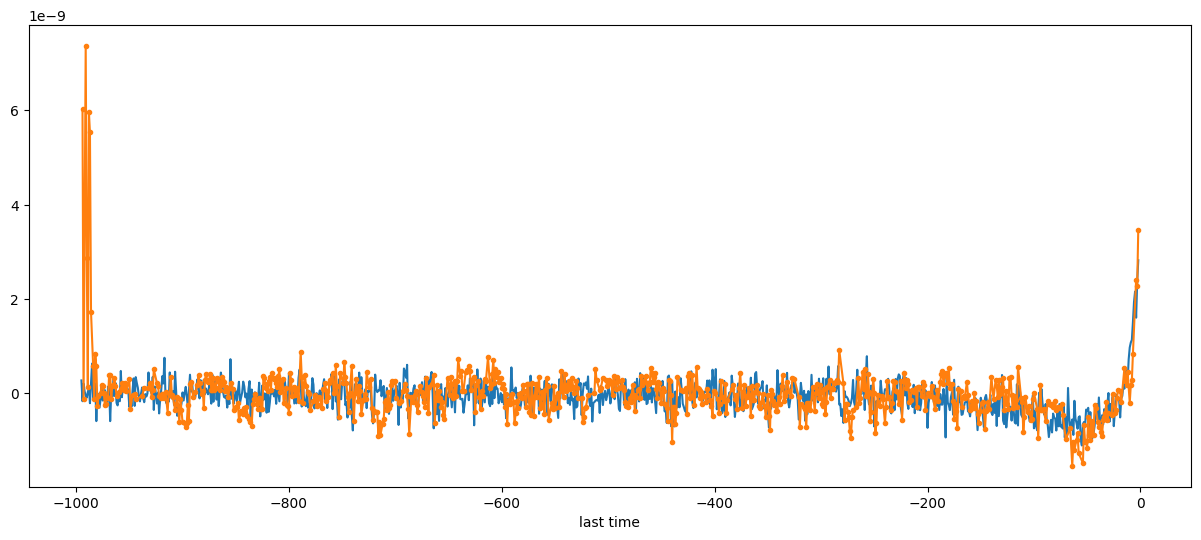

In [109]:
plt.figure(figsize=(15,6))

y.plot(ax=plt.gca(), marker='')
y_sorted.plot(ax=plt.gca(),legend=None, marker=".")

Since random points are used for training, the predictions are quite close.

Now lets try to provide an initial set, and see the eruption can be estimated with the same data.



In [110]:
#X_new_test = big_frame[0:100]
#X_new_test
#X_test_selected
X_train_selected
#y_train
#X_train_selected.columns
#y_new_pred = pd.Series(ada.predict(X_new_test), index=X_new_test.index)

,Sensor__c3__lag_2,Sensor__abs_energy,Sensor__root_mean_square,"Sensor__fft_coefficient__attr_""abs""__coeff_0",Sensor__absolute_maximum,Sensor__mean_n_absolute_max__number_of_maxima_7,Sensor__benford_correlation,Sensor__friedrich_coefficients__coeff_3__m_3__r_30,"Sensor__fft_aggregated__aggtype_""kurtosis""","Sensor__fft_aggregated__aggtype_""variance""",...,Sensor__c3__lag_1,"Sensor__cwt_coefficients__coeff_3__w_10__widths_(2, 5, 10, 20)","Sensor__cwt_coefficients__coeff_3__w_2__widths_(2, 5, 10, 20)","Sensor__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","Sensor__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""mean""","Sensor__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)","Sensor__linear_trend__attr_""intercept""","Sensor__fft_aggregated__aggtype_""centroid""","Sensor__cwt_coefficients__coeff_2__w_5__widths_(2, 5, 10, 20)","Sensor__agg_linear_trend__attr_""intercept""__chunk_len_5__f_agg_""mean"""
last time,,,,,,,,,,,,,,,,,,,,,
-713,1.113262e-30,1.640163e-18,2.794692e-10,2.357636e-10,6.377088e-10,4.247973e-10,0.347468,1.854476e-11,22.500698,8.519571,...,-2.279448e-30,2.175554e-11,7.870130e-11,-5.211500e-10,-6.216017e-11,-5.392315e-11,-5.844027e-12,4.729965,1.014158e-10,-8.619074e-11
-20,-4.857620e-29,3.613842e-18,4.148346e-10,7.218943e-09,7.390555e-10,6.183979e-10,0.072168,-4.370662e-10,3.831966,11.732473,...,-4.591446e-29,-1.115412e-09,-2.219083e-10,-8.260098e-10,-4.404722e-10,-8.719006e-10,-4.917045e-10,3.044375,-6.705828e-10,-4.755641e-10
-866,1.094280e-31,7.226101e-19,1.854993e-10,1.853737e-09,3.934095e-10,2.787290e-10,0.937694,5.490738e-11,14.855278,12.394221,...,-1.695206e-30,2.858530e-10,-2.632460e-11,-1.818109e-10,9.756341e-11,2.092580e-10,1.274722e-10,5.111660,1.949981e-10,9.795836e-11
-429,2.526253e-29,2.519373e-18,3.463671e-10,2.402195e-09,7.026460e-10,4.956345e-10,0.601312,-3.096599e-10,18.333530,9.659310,...,-2.454079e-30,-2.509510e-10,-3.533109e-10,-7.779153e-10,-8.742206e-11,-7.028889e-11,-1.026543e-10,4.767520,-8.388798e-11,-9.668545e-11
-635,-1.122022e-30,8.740479e-19,2.040131e-10,1.140630e-09,4.109889e-10,3.026650e-10,0.948242,-1.477196e-10,18.549073,8.044174,...,-1.595068e-30,-1.614643e-10,-8.939028e-13,-3.145103e-10,5.385941e-12,-1.360174e-10,-4.279051e-11,4.379214,-9.607582e-11,1.877015e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-197,3.206418e-31,1.398517e-18,2.580621e-10,2.708981e-09,7.329521e-10,3.900270e-10,0.717567,-2.100471e-10,10.476635,11.935402,...,1.867390e-30,-3.294236e-10,4.825106e-11,-5.873417e-10,-1.486612e-10,-2.897288e-10,-1.054520e-10,4.548499,-7.974950e-11,-1.360266e-10
-317,-1.315356e-30,9.905161e-19,2.171806e-10,3.929364e-10,5.568975e-10,3.198085e-10,0.868585,4.945390e-11,28.118941,7.819048,...,2.274453e-30,1.064096e-10,-1.412937e-12,-4.364472e-10,1.586601e-11,-6.941384e-11,9.012511e-11,4.809564,7.911968e-11,5.350814e-11
-935,7.896717e-31,6.930549e-19,1.816662e-10,2.933675e-10,3.428622e-10,2.732219e-10,0.963096,-4.449999e-11,38.708155,8.318107,...,-2.732080e-30,4.374214e-11,1.693527e-10,-2.998718e-10,4.629093e-11,-1.664784e-10,6.956224e-11,5.409929,1.023395e-10,8.480067e-11


In [ ]:
#More steps to do:

#mse = mean_squared_error(big_frame(id='0'), y_test)

#Other regressions
#DecisionTree
#model = DecisionTreeRegressor().fit(X_train,y_train)
#Ensemble
#model = RandomForestRegressor().fit(X_train_y_train)
#Linear


#Optimize hyperparameters
#algo = GradientBoostRegressor()
#params = {
#    'learning rate': [0.1, 0.5, 1.0],
#    'n_estimators': [50, 100, 150]
#}
#score=make_scorer(r2_score)
#gridsearch = GridSearchCV(algo,params,scoring=score,cv=3, return_train_score=True)
#gridsearch.fit(X_train,y_train)
#Get best model
#model=gridsearch.best_estimator_
#predictions = model.predict(X_test)
